In [1]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import datetime

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read the data
d=pd.read_excel("Book3.xlsx")
d.tail()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME
220091,2018-12-06,ZEALBANGLA,38.0,38.0,36.8,37.2,37.5,37.2,11,0.116,3080
220092,2018-12-05,ZEALBANGLA,38.4,38.4,36.5,38.0,37.2,36.0,11,0.284,7637
220093,2018-12-04,ZEALBANGLA,36.0,37.7,36.0,37.7,36.0,37.7,40,0.697,19314
220094,2018-12-03,ZEALBANGLA,37.8,39.6,37.5,39.6,37.7,36.8,19,0.110,2931
220095,2018-12-02,ZEALBANGLA,36.7,38.1,36.7,38.1,36.8,37.8,4,0.011,300


In [3]:
# remove leading and trainling blank spaces from column names
d.columns=d.columns.str.strip()

In [4]:
# remove leanding and trailing blank spaces from TRADING CODEs
d['TRADING CODE']=d['TRADING CODE'].str.strip()

In [5]:
# select the Instrument of your interest
df=d[d['TRADING CODE']=='ACI']

In [6]:
# remove rows with invalid values
df=df[~(df['LTP']==0)|(df['HIGH']==0)|(df['LOW']==0)|(df['OPENP']==0)|(df['CLOSEP']==0)]
df.shape

(528, 11)

In [7]:
df.head()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME
7,2018-08-16,ACI,363.8,365.3,362.7,362.7,363.0,362.5,317,7.019,19317
580,2018-08-14,ACI,362.3,364.9,361.0,361.0,362.5,364.5,265,10.127,27911
1153,2018-08-13,ACI,365.0,366.0,363.1,363.1,364.5,364.0,286,9.172,25212
1726,2018-08-12,ACI,364.0,367.0,363.5,367.0,364.0,365.0,250,8.732,23936
2299,2018-08-09,ACI,365.4,371.8,364.6,371.8,365.0,369.1,461,15.324,41913


In [8]:
# sort the data as per date
df=df.sort_values(['DATE'], ascending=True)

In [9]:
df.head()

,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE (mn),VOLUME
146575,2017-01-01,ACI,387.0,390.0,386.2,388.0,386.7,385.5,603,25.792,66644
146338,2017-01-02,ACI,403.0,404.0,390.0,390.0,402.1,386.7,1431,79.082,199196
146101,2017-01-03,ACI,415.2,415.8,402.0,402.0,414.7,402.1,1685,87.066,212297
145864,2017-01-04,ACI,413.5,422.9,412.8,418.6,413.5,414.7,1088,62.533,150348
145627,2017-01-05,ACI,408.5,416.0,404.0,416.0,406.4,413.5,941,49.441,120674


In [10]:
# keep only the required columns
dx=df[['DATE', 'CLOSEP']]
dx.head()

,DATE,CLOSEP
146575,2017-01-01,386.7
146338,2017-01-02,402.1
146101,2017-01-03,414.7
145864,2017-01-04,413.5
145627,2017-01-05,406.4


In [11]:
# set the date column as index
dx.set_index(['DATE'], inplace=True)

In [12]:
dx.tail(20)

,CLOSEP
DATE,
2019-01-28,338.5
2019-01-29,315.0
2019-01-30,303.7
2019-01-31,299.3
2019-02-03,302.6
2019-02-04,310.9
2019-02-05,304.4
2019-02-06,301.3
2019-02-07,305.0


In [13]:
# turn the column into a numpy array
dataset=dx.values

In [14]:
# set first 75% values as training data and the rest as test data
train = dataset[:int(len(dataset)*.75),:]
valid = dataset[int(len(dataset)*.75):,:]

In [15]:
# scaling the values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [16]:
# creating x_train and y_train, seeting the array as 0 dimensional, each time x_train.append is giving 30 values with 0 dimension,then set each as 
# rows
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
# check the shape
x_train.shape

(366, 30)

In [18]:
# turn x_train as three dimensional
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(366, 30, 1)

In [19]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [20]:
# compile the model
import keras
from keras.models import load_model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
model.compile(loss='mean_absolute_percentage_error', optimizer='adam') # model will try to minimize mape
ks = keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=100) # model will wait for the next 200 model, if no improvement, stop
checkpointer = keras.callbacks.ModelCheckpoint(filepath="weights.hdf5", monitor='loss', verbose=0, save_best_only=True) # best model so far will be saved
model.fit(x_train, y_train, epochs=500, validation_split=0.1, verbose=0, callbacks=[ks, checkpointer]) # now the fitted model will run 4000 trials for best model
model=load_model('weights.hdf5') # now the best model will be loaded from saved file

Epoch 00363: early stopping


In [21]:
#predicting values, using past 30 from the train data
inputs = dx.values[len(dx) - len(valid) - 30:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [22]:
# creating X_test
X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

In [23]:
# turn X_test into 3 dimensional
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# forecasting future values ie calculating y_test
closing_price = model.predict(X_test)
cl=closing_price

# turning the forecasting values back to original scale
closing_price = scaler.inverse_transform(closing_price)

In [24]:
# model evaluate
train_acc = model.evaluate(x_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, cl, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 3.418, Test: 0.000


In [25]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

6.408297858853887

In [26]:
# calculating MAPE
import keras
from keras import losses
k=keras.losses.mean_absolute_percentage_error(valid, closing_price)
print(k)
sum(abs(valid-closing_price)/abs(valid))*100*(1/len(valid))

Tensor("mul:0", shape=(132,), dtype=float64)


array([1.22019742])

In [27]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


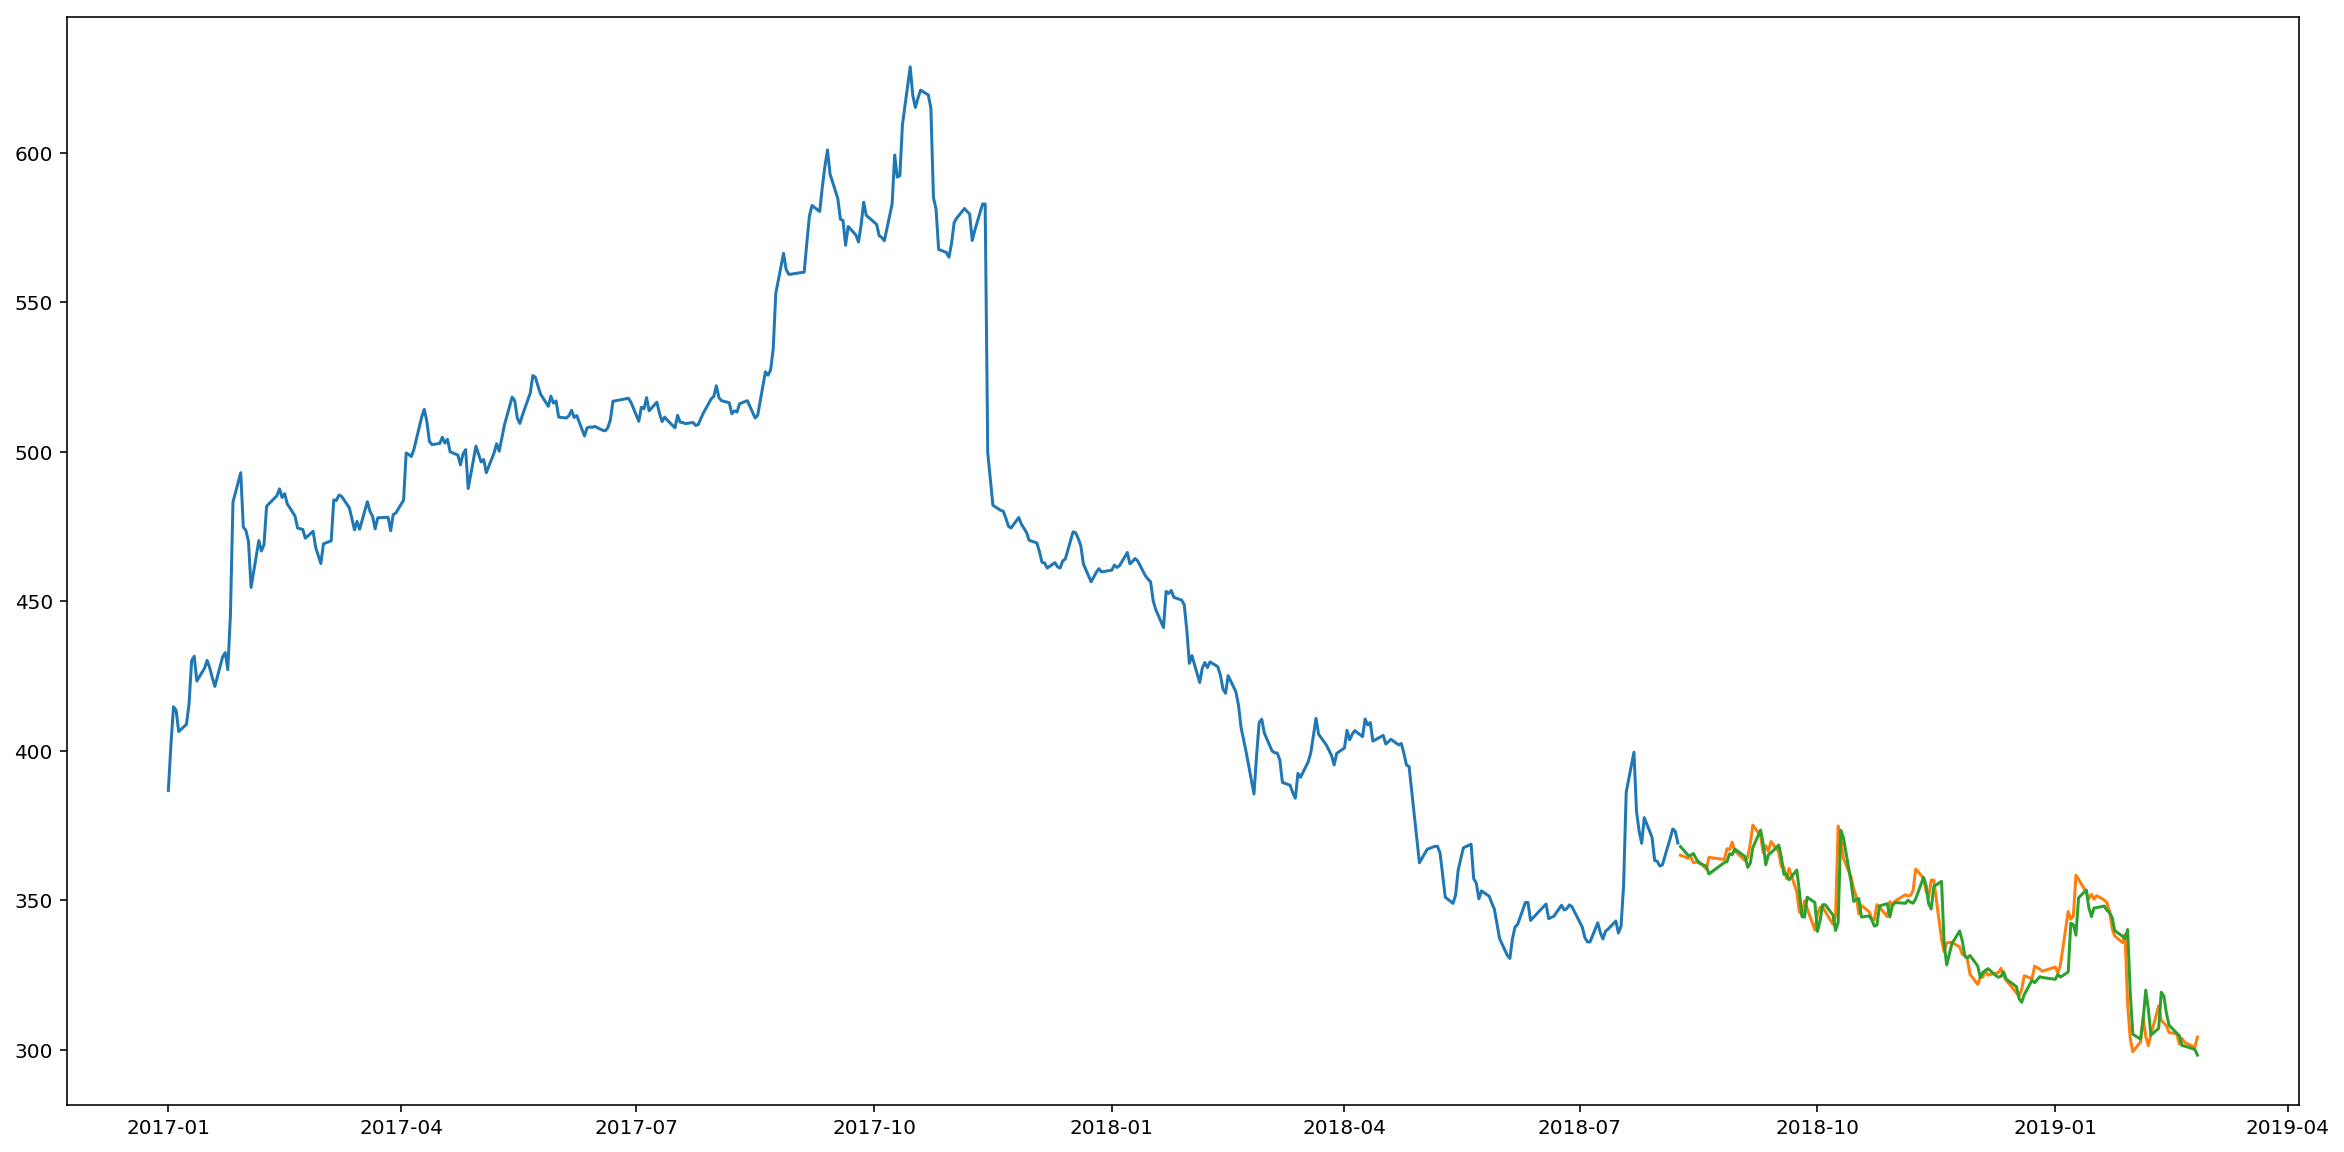

In [28]:
# for plotting
plt.figure(figsize=(20,10))
train = dx[:int(len(dataset)*.75)]
valid = dx[int(len(dataset)*.75):]
valid['Predictions'] = closing_price
plt.plot(train['CLOSEP'])
plt.plot(valid[['CLOSEP','Predictions']])

In [29]:
se=scaled_data[-30:]
st=se.reshape((1, 30, 1))
yhat=np.zeros(shape=(30,1))
for i in range(0,30):
    yhat[i] = model.predict(st, verbose=0)
    st=np.append(st, yhat[i])[-30:].reshape(1,30,1)

yx= scaler.inverse_transform(yhat)
yx.shape

(30, 1)

In [30]:
yx=np.concatenate(yx).ravel().tolist()

In [31]:
yx

[300.43131844066085,
 298.7846826256253,
 296.8653997869231,
 295.565870123636,
 295.17388626718895,
 295.566106414143,
 296.39580462565647,
 297.28148680943997,
 297.97145355558024,
 298.4167779993266,
 298.6858407721855,
 298.8695078489371,
 298.86074300548063,
 298.5693581446074,
 297.91373422900216,
 296.9235628486611,
 295.7426491786726,
 294.5058702954091,
 293.3842627808452,
 292.5187349498272,
 292.00479143597187,
 291.80708931684495,
 291.8956166293472,
 292.2037382230163,
 292.6511288277805,
 293.1655338753015,
 293.6534031920135,
 294.0543470617384,
 294.2876692076214,
 294.2968814686872]

In [32]:
weekmask = 'Sun Mon Tue Wed Thu'
custombday = pd.offsets.CustomBusinessDay(weekmask=weekmask)
pday=pd.bdate_range(start=df.iloc[dx.shape[0]-1, 0]+datetime.timedelta(days=1), end=df.iloc[dx.shape[0]-1, 0]+datetime.timedelta(days=365), freq=custombday ).tolist()[0:30]
pday

[Timestamp('2019-02-26 00:00:00', freq='C'),
 Timestamp('2019-02-27 00:00:00', freq='C'),
 Timestamp('2019-02-28 00:00:00', freq='C'),
 Timestamp('2019-03-03 00:00:00', freq='C'),
 Timestamp('2019-03-04 00:00:00', freq='C'),
 Timestamp('2019-03-05 00:00:00', freq='C'),
 Timestamp('2019-03-06 00:00:00', freq='C'),
 Timestamp('2019-03-07 00:00:00', freq='C'),
 Timestamp('2019-03-10 00:00:00', freq='C'),
 Timestamp('2019-03-11 00:00:00', freq='C'),
 Timestamp('2019-03-12 00:00:00', freq='C'),
 Timestamp('2019-03-13 00:00:00', freq='C'),
 Timestamp('2019-03-14 00:00:00', freq='C'),
 Timestamp('2019-03-17 00:00:00', freq='C'),
 Timestamp('2019-03-18 00:00:00', freq='C'),
 Timestamp('2019-03-19 00:00:00', freq='C'),
 Timestamp('2019-03-20 00:00:00', freq='C'),
 Timestamp('2019-03-21 00:00:00', freq='C'),
 Timestamp('2019-03-24 00:00:00', freq='C'),
 Timestamp('2019-03-25 00:00:00', freq='C'),
 Timestamp('2019-03-26 00:00:00', freq='C'),
 Timestamp('2019-03-27 00:00:00', freq='C'),
 Timestamp

In [33]:
xp=pd.DataFrame({'Date':pday, 'Forecast':yx})
xp

,Date,Forecast
0,2019-02-26,300.431318
1,2019-02-27,298.784683
2,2019-02-28,296.865400
3,2019-03-03,295.565870
4,2019-03-04,295.173886
5,2019-03-05,295.566106
6,2019-03-06,296.395805
7,2019-03-07,297.281487
8,2019-03-10,297.971454
9,2019-03-11,298.416778


In [34]:
xp.set_index('Date', inplace=True)

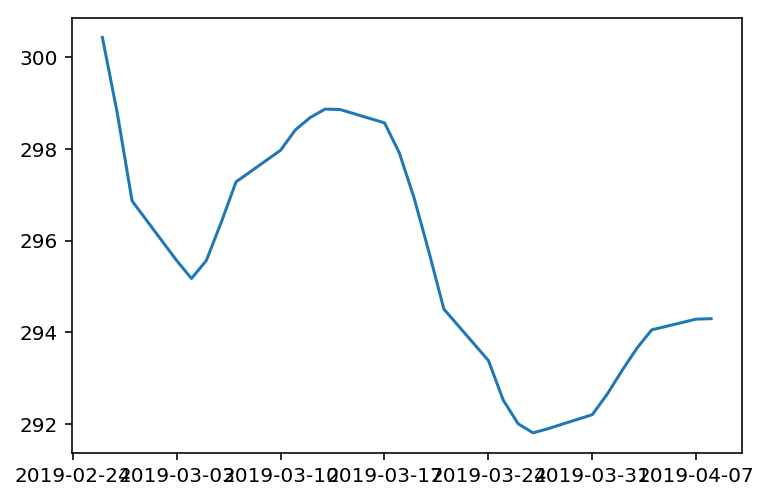

In [35]:
plt.plot(xp['Forecast'])

In [48]:
zx=pd.merge(valid, xp, left_index=True, right_index=True, how='outer')
zx.tail()

,CLOSEP,Predictions,Forecast
2019-04-02,NaN,NaN,293.165534
2019-04-03,NaN,NaN,293.653403
2019-04-04,NaN,NaN,294.054347
2019-04-07,NaN,NaN,294.287669
2019-04-08,NaN,NaN,294.296881


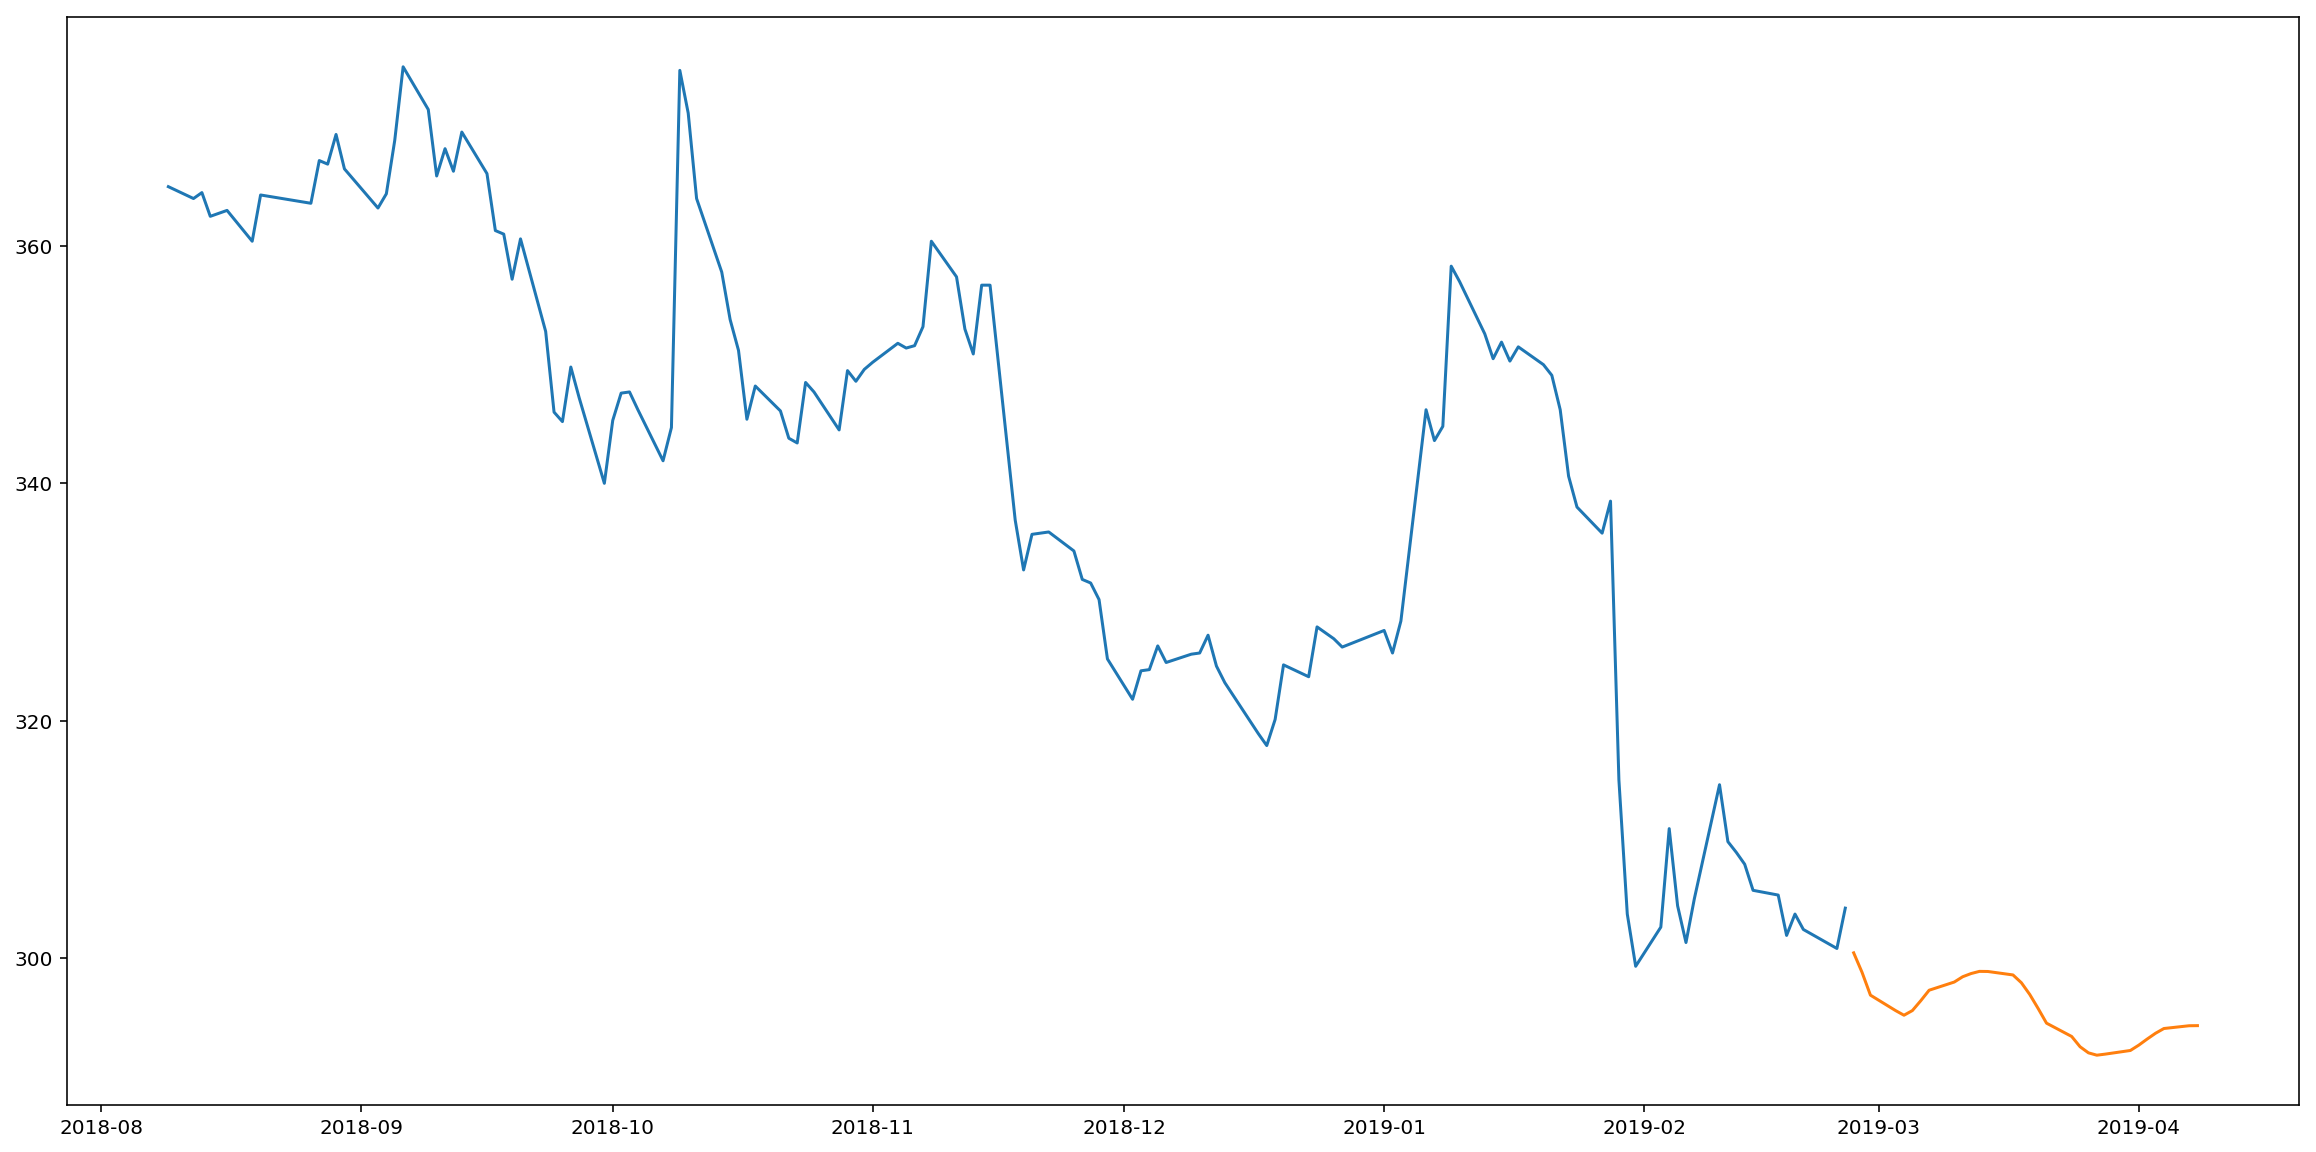

In [49]:
# for plotting
plt.figure(figsize=(20,10))
plt.plot(zx[['CLOSEP', 'Forecast']])

In [37]:
from datetime import datetime, date, time, timedelta